## Tipos de aprendizaje

* Aprendizaje supervisado
    * Clasificación.
        * Clasificación binaria.
        * Clasificación multiclase.
    * Regresión.

* Aprendizaje no supervisado.
    * Clustering.
    * Reducción de la dimensionalidad.
    * Detección de anomalías.

* Aprendizaje semi-supervisado
* Aprendizaje por refuerzo

### Aprendizaje no supervisado

Aunque la mayoría de las aplicaciones del Machine Learning se basan hoy en día en el aprendizaje supervisado (y, como resultado, es ahí donde se realizan las mayores inversiones), la inmensa mayoría de los datos disponibles no están etiquetados: tenemos las características de entrada ***X***, pero no tenemos las etiquetas ***y***.

#### Clustering

El clustering busca particionar el set de datos en grupos, los cuales son llamados *clusters*. El objetivo consiste en separar los datos de tal forma que los puntos dentro de un clúster sean muy similares y se diferencien con puntos de otros clusters.

##### K-Means

El algoritmo K-Means trata de encontrar los centros de los clusters que sean representativos de ciertas regiones de los datos. El algoritmo alterna tres pasos en su ejecución:

1. Se determina un número de clusters.
2. Busca alrededor de cada centro los puntos más cercanos.
3. Recalcula el centro como el promedio de los puntos dentro de ese cluster.

![SegmentLocal](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif "segment")

In [ ]:
!pip install yellowbrick

In [15]:
import mglearn
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer

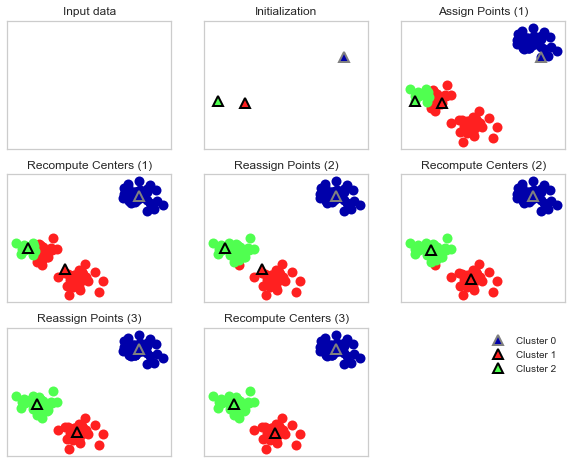

In [2]:
mglearn.plots.plot_kmeans_algorithm()

In [3]:
auto = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/DS-ONLINE-76/master/data/mpg.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Preprocesamiento

* Eliminar las variables que no voy a usar
* Tratar los datos missing
* Escalar los datos numericos

In [5]:
cols_to_drop = ["model_year", "origin", "name"]

auto.drop(labels=cols_to_drop, axis=1, inplace=True)

In [6]:
imputer = SimpleImputer(strategy="median")

auto = pd.DataFrame(imputer.fit_transform(auto), columns=auto.columns)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8.0,307.0,130.0,3504.0,12.0
1,15.0,8.0,350.0,165.0,3693.0,11.5
2,18.0,8.0,318.0,150.0,3436.0,11.0
3,16.0,8.0,304.0,150.0,3433.0,12.0
4,17.0,8.0,302.0,140.0,3449.0,10.5


In [7]:
# from IPython.display import display

In [8]:
# display(auto.head())
# display(auto.tail())

In [9]:
# Escalar los datos

scaler = RobustScaler()

In [10]:
auto = pd.DataFrame(scaler.fit_transform(auto), columns=auto.columns)

## K-Means

**Nota**: Es un algoritmo que funciona solo con variables numéricas

In [11]:
kmeans = KMeans(n_clusters=6).fit(auto)

In [12]:
# Centroides

kmeans.cluster_centers_

array([[ 0.1943436 ,  0.0461165 , -0.1472774 , -0.02496533, -0.21992562,
        -0.18113317],
       [-0.33228986,  0.53333333,  0.51892235,  0.13496599,  0.35737764,
         0.40636816],
       [-0.68670077,  0.99264706,  1.10646033,  1.0987395 ,  0.88756919,
        -0.61940299],
       [ 0.46678261,  0.02      , -0.24329635, -0.46367347, -0.28338812,
         1.33492537],
       [-0.81767181,  1.        ,  1.57793569,  1.98321264,  1.1115487 ,
        -1.33558016],
       [ 1.00587875,  0.00704225, -0.31539475, -0.46205806, -0.51831088,
         0.18372924]])

In [13]:
kmeans.inertia_

189.1331954584782

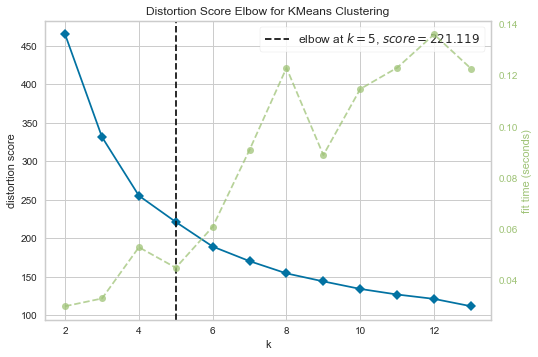

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
kmeans = KMeans()

visualizer = KElbowVisualizer(estimator=kmeans, k=(2, 14))
visualizer.fit(auto)
visualizer.show()

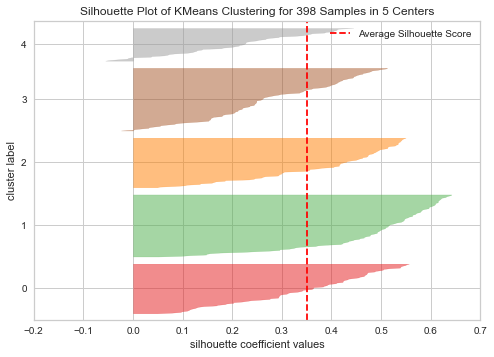

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 398 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
silhouette = SilhouetteVisualizer(estimator=KMeans(n_clusters=5))
silhouette.fit(auto)
silhouette.show()

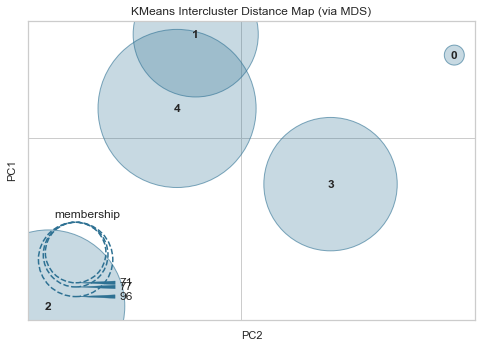

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [17]:
distances = InterclusterDistance(estimator=KMeans(n_clusters=5))
distances.fit(auto)
distances.show()

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components=2, random_state=42)

tsne_matrix = tsne.fit_transform(auto)

In [21]:
kmeans = KMeans(n_clusters=5).fit(auto)

tsne_df = pd.DataFrame(tsne_matrix, columns=["x", "y"])
tsne_df["cluster"] = kmeans.predict(auto)

<AxesSubplot:xlabel='x', ylabel='y'>

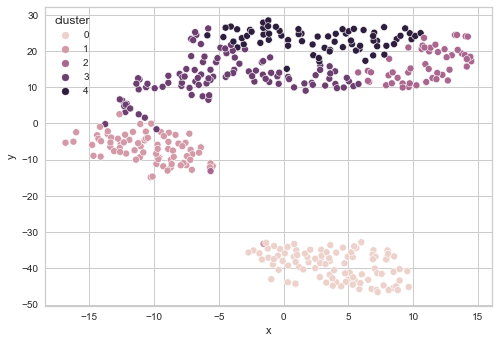

In [22]:
import seaborn as sns

sns.scatterplot(data=tsne_df, x="x", y="y", hue="cluster")

In [23]:
auto["cluster"] = pd.Series(kmeans.predict(auto)).apply(lambda x: f"cluster_{int(x + 1)}")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,cluster
0,-0.434783,1.0,1.004754,0.744898,0.506050,-1.044776,cluster_1
1,-0.695652,1.0,1.277338,1.459184,0.642586,-1.194030,cluster_1
2,-0.434783,1.0,1.074485,1.153061,0.456926,-1.343284,cluster_1
3,-0.608696,1.0,0.985737,1.153061,0.454759,-1.044776,cluster_1
4,-0.521739,1.0,0.973059,0.948980,0.466318,-1.492537,cluster_1


In [24]:
auto["cluster"].value_counts()

cluster_4    103
cluster_1     96
cluster_2     77
cluster_5     71
cluster_3     51
Name: cluster, dtype: int64

In [25]:
columns = auto.drop("cluster", axis=1).columns.tolist()

auto.loc[:, columns] = scaler.inverse_transform(auto[columns])
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,cluster
0,18.0,8.0,307.0,130.0,3504.0,12.0,cluster_1
1,15.0,8.0,350.0,165.0,3693.0,11.5,cluster_1
2,18.0,8.0,318.0,150.0,3436.0,11.0,cluster_1
3,16.0,8.0,304.0,150.0,3433.0,12.0,cluster_1
4,17.0,8.0,302.0,140.0,3449.0,10.5,cluster_1
...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,cluster_4
394,44.0,4.0,97.0,52.0,2130.0,24.6,cluster_3
395,32.0,4.0,135.0,84.0,2295.0,11.6,cluster_4
396,28.0,4.0,120.0,79.0,2625.0,18.6,cluster_3


In [27]:
auto.groupby(by="cluster").mean().style.background_gradient(cmap="Blues")

,mpg,cylinders,displacement,horsepower,weight,acceleration
cluster,,,,,,
cluster_1,14.503125,7.979167,348.468750,162.135417,4147.135417,12.612500
cluster_2,19.100000,6.181818,231.831169,101.084416,3306.636364,16.705195
cluster_3,28.280392,4.156863,113.058824,71.156863,2431.000000,20.015686
cluster_4,25.234951,4.184466,125.266990,92.276699,2499.067961,14.893204
cluster_5,34.567606,4.028169,98.746479,70.859155,2086.028169,16.115493
